### Assignment2
##### 201402167 경영학전공 윤현우

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [228]:
data = pd.read_csv(('C:/develop/jupyter notebook/doosan bears.csv'))

In [229]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,park
0,APR,10,56000,Tuesday,Lotte,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Lotte,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Lotte,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,LG,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,LG,57,Cloudy,Night,NO,NO,NO,NO


# 1. promotion이 관중을 동원하는 데에 영향이 있을까?

In [230]:
def transform(row):
    if (row['cap'] == 'YES') or (row['shirt'] == 'YES') or (row['fireworks'] == 'YES'):
        return 'YES'
    else:
        return 'NO'

In [231]:
data['Promotion_if'] = data.apply(transform, axis=1)

In [232]:
data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,park,Promotion_if
0,APR,10,56000,Tuesday,Lotte,67,Clear,Day,NO,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Lotte,58,Cloudy,Night,NO,NO,NO,NO,NO
2,APR,12,28328,Thursday,Lotte,57,Cloudy,Night,NO,NO,NO,NO,NO
3,APR,13,31601,Friday,LG,54,Cloudy,Night,NO,NO,YES,NO,YES
4,APR,14,46549,Saturday,LG,57,Cloudy,Night,NO,NO,NO,NO,NO


In [233]:
fit=ols('attend ~ month + day_of_week + park + Promotion_if + temp + skies + day_night + day', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     4.448
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           5.29e-06
Time:                        19:04:05   Log-Likelihood:                -811.77
No. Observations:                  81   AIC:                             1662.
Df Residuals:                      62   BIC:                             1707.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.741e+04   1.36e+04      2.761      0.008    1.03e+04    6.45e+04
month[T.AUG]                17.0597   3680.129      0.005      0.996   -7339.413    7373.532
month[T.JUL]              1453.5295   3272.885      0.444      0.659   -5088.874    7995.933
month[T.JUN]              5384.9010   3156.541      1.706      0.093    -924.935    1.17e+04
month[T.MAY]             -3737.7147   2700.890     -1.384      0.171   -9136.717    1661.288
month[T.OCT]             -3328.6343   6258.005     -0.532      0.597   -1.58e+04    9180.940
month[T.SEP]             -2267.7846   4959.158     -0.457      0.649   -1.22e+04    7645.432
day_of_week[T.Monday]    -4565.9432   3931.637     -1.161      0.250   -1.24e+04    3293.287
day_of_week[T.Saturday]   2431.6606   4006.478      0.607      0.546   -5577.175    1.04e+04
day_of_week[T.Sunday]     1281.7620   4434.968      0.289      0.774   -7583.613    1.01e+04
day_of_week[T.Thursday]  -3178.2082   4533.854     -0.701      0.486   -1.22e+04    5884.837
day_of_week[T.Tuesday]    3441.5153   3763.247      0.915      0.364   -4081.108     1.1e+04
day_of_week[T.Wednesday] -1528.2078   4199.915     -0.364      0.717   -9923.718    6867.303
park[T.YES]                1.09e+04   2753.508      3.959      0.000    5396.442    1.64e+04
Promotion_if[T.YES]       1052.6461   3171.230      0.332      0.741   -5286.553    7391.845
skies[T.Cloudy]          -2515.0990   2007.830     -1.253      0.215   -6528.694    1498.496
day_night[T.Night]        -214.9791   3074.728     -0.070      0.944   -6361.272    5931.314
temp                        55.9069    196.978      0.284      0.777    -337.847     449.661
day                        -61.3418     86.509     -0.709      0.481    -234.271     111.588
==============================================================================
Omnibus:                        5.313   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.948
Skew:                           0.604   Prob(JB):                       0.0842
Kurtosis:                       3.083   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

마케팅 프로모션이 관중동원에 효과가 있는지 없는지 확인하기 위해 다른 변수들을 고려해야하는지 살펴보고자 한다.<br>
그에 따라 full model을 구성하였는데, skies와 day_night, temp, day의 p-value가 0.05 이상라는 결과를 확인했다.<br>
따라서 skies와 day_night, temp, day는 통제변수로서 활용하지 않기로 결정한다.

In [234]:
fit=ols('attend ~ month + day_of_week + park + Promotion_if', data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     5.660
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           4.99e-07
Time:                        19:04:07   Log-Likelihood:                -813.41
No. Observations:                  81   AIC:                             1657.
Df Residuals:                      66   BIC:                             1693.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  3.75e+04   3927.641      9.547      0.000    2.97e+04    4.53e+04
month[T.AUG]              2358.2619   2418.357      0.975      0.333   -2470.145    7186.668
month[T.JUL]              2849.6903   2594.674      1.098      0.276   -2330.744    8030.124
month[T.JUN]              7072.1827   2758.485      2.564      0.013    1564.690    1.26e+04
month[T.MAY]             -2276.8504   2320.333     -0.981      0.330   -6909.544    2355.843
month[T.OCT]              -498.4763   4090.830     -0.122      0.903   -8666.081    7669.129
month[T.SEP]                42.1934   2537.164      0.017      0.987   -5023.417    5107.804
day_of_week[T.Monday]    -3724.7143   3760.761     -0.990      0.326   -1.12e+04    3783.888
day_of_week[T.Saturday]   2739.1705   3887.977      0.705      0.484   -5023.425    1.05e+04
day_of_week[T.Sunday]     2903.5963   3538.527      0.821      0.415   -4161.301    9968.493
day_of_week[T.Thursday]  -2905.5790   4468.421     -0.650      0.518   -1.18e+04    6015.912
day_of_week[T.Tuesday]    3991.5731   3563.052      1.120      0.267   -3122.289    1.11e+04
day_of_week[T.Wednesday] -1146.5807   3964.234     -0.289      0.773   -9061.430    6768.269
park[T.YES]               1.095e+04   2497.451      4.383      0.000    5959.772    1.59e+04
Promotion_if[T.YES]       1289.0259   3104.218      0.415      0.679   -4908.745    7486.796
==============================================================================
Omnibus:                        6.422   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.877
Skew:                           0.643   Prob(JB):                       0.0529
Kurtosis:                       3.293   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 이상치 제거 과정

In [235]:
influence = fit.get_influence()
cooks_d2, pvals = influence.cooks_distance
K=influence.k_vars
fox_cr = 4/(len(data['attend'])-K-1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx

array([ 0, 30, 41, 42, 70, 71], dtype=int64)

In [236]:
new_data = data.drop(idx,0)

In [237]:
new_fit=ols('attend ~ month + day_of_week + park + Promotion_if', data=new_data).fit()
new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     10.63
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           1.55e-11
Time:                        19:04:11   Log-Likelihood:                -734.20
No. Observations:                  75   AIC:                             1498.
Df Residuals:                      60   BIC:                             1533.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.476e+04   3773.857      9.210      0.000    2.72e+04    4.23e+04
month[T.AUG]              3748.7816   1935.365      1.937      0.057    -122.524    7620.088
month[T.JUL]              3837.7389   2220.228      1.729      0.089    -603.378    8278.856
month[T.JUN]              7234.0008   2279.497      3.174      0.002    2674.328    1.18e+04
month[T.MAY]              -917.4101   1885.010     -0.487      0.628   -4687.991    2853.171
month[T.OCT]              1959.0351   3265.436      0.600      0.551   -4572.809    8490.879
month[T.SEP]             -1721.4433   2160.969     -0.797      0.429   -6044.025    2601.138
day_of_week[T.Monday]    -2709.9505   3680.704     -0.736      0.464   -1.01e+04    4652.553
day_of_week[T.Saturday]   5139.8469   3621.166      1.419      0.161   -2103.563    1.24e+04
day_of_week[T.Sunday]     4948.4357   3234.665      1.530      0.131   -1521.857    1.14e+04
day_of_week[T.Thursday]  -3438.7723   4177.336     -0.823      0.414   -1.18e+04    4917.144
day_of_week[T.Tuesday]    4982.0907   3467.601      1.437      0.156   -1954.145    1.19e+04
day_of_week[T.Wednesday] -2313.4221   3732.523     -0.620      0.538   -9779.579    5152.735
park[T.YES]               1.169e+04   2054.376      5.691      0.000    7582.709    1.58e+04
Promotion_if[T.YES]       3561.8410   3116.376      1.143      0.258   -2671.839    9795.521
==============================================================================
Omnibus:                        5.185   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.962
Skew:                           0.630   Prob(JB):                       0.0837
Kurtosis:                       2.967   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결론
박철순 인형 프로모션을 제공한 경우, 제공하지 않을 때보다 11690명 더 관중을 동원했으며<br>
그 외의 불꽃놀이, 셔츠, 모자 프로모션을 제공한 경우 약 3562명 정도를 더 동원했다고 확인할 수 있다.<br>
다만, 박철순 인형 프로모션 외의 마케팅 프로모션은 p-value가 0.258으로 유의수준 0.05보다 높다.<br>
즉, 전체적으로는 프로모션의 효과가 있어보이긴 하지만 박철순 인형 프로모션을 제외하고는 유의하다고 설명하기는 힘들다.

### 결론 시각화

In [212]:
def transform_for_visualization(row):
    if (row['cap'] == 'YES') or (row['shirt'] == 'YES') or (row['fireworks'] == 'YES') or (row['park'] == 'YES'):
        return 'YES'
    else:
        return 'NO'
    
new_data['Promotion_if_for_visualization'] = new_data.apply(transform_for_visualization, axis=1)

In [223]:
new_data.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,park,Promotion_if,Promotion_if2,Promotion_if_for_visualization
1,APR,11,29729,Wednesday,Lotte,58,Cloudy,Night,NO,NO,NO,NO,NO,NO,NO
2,APR,12,28328,Thursday,Lotte,57,Cloudy,Night,NO,NO,NO,NO,NO,NO,NO
3,APR,13,31601,Friday,LG,54,Cloudy,Night,NO,NO,YES,NO,YES,YES,YES
4,APR,14,46549,Saturday,LG,57,Cloudy,Night,NO,NO,NO,NO,NO,NO,NO
5,APR,15,38359,Sunday,LG,65,Clear,Day,NO,NO,NO,NO,NO,NO,NO


In [213]:
import seaborn as sns

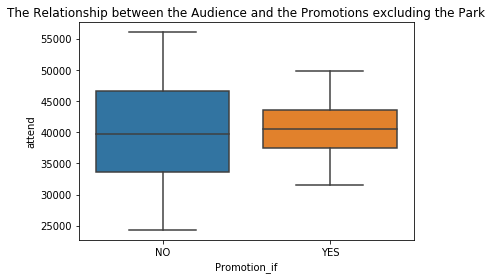

In [219]:
sns.boxplot(x=new_data['Promotion_if'], y = new_data['attend'], data=new_data)
plt.title('The Relationship between the Audience and the Promotions excluding the Park')
plt.show()

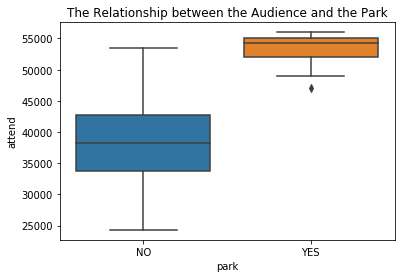

In [221]:
sns.boxplot(x=new_data['park'], y = new_data['attend'], data=new_data)
plt.title('The Relationship between the Audience and the Park')
plt.show()

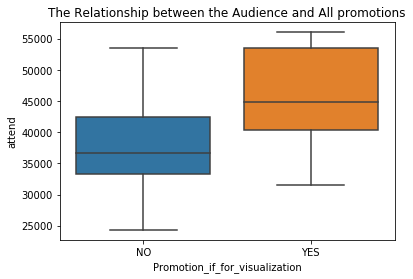

In [222]:
sns.boxplot(x=new_data['Promotion_if_for_visualization'], y = new_data['attend'], data=new_data)
plt.title('The Relationship between the Audience and All promotions')
plt.show()

# 2. 각각의 promotion의 영향력은 어느정도인가?

In [242]:
def type(row):
    if (row['cap'] == 'YES'):
        return 'cap'
    elif (row['shirt'] == 'YES'):
        return 'shirt'
    elif (row['fireworks'] == 'YES'):
        return 'fireworks'
    elif (row['park'] == 'YES'):
        return 'park'
    else:
        return 'None'

In [243]:
new_data['Promotion_type'] = new_data.apply(type, axis=1)

In [244]:
new_data.head(20)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,park,Promotion_if,Promotion_type
1,APR,11,29729,Wednesday,Lotte,58,Cloudy,Night,NO,NO,NO,NO,NO,None
2,APR,12,28328,Thursday,Lotte,57,Cloudy,Night,NO,NO,NO,NO,NO,None
3,APR,13,31601,Friday,LG,54,Cloudy,Night,NO,NO,YES,NO,YES,fireworks
4,APR,14,46549,Saturday,LG,57,Cloudy,Night,NO,NO,NO,NO,NO,None
5,APR,15,38359,Sunday,LG,65,Clear,Day,NO,NO,NO,NO,NO,None
6,APR,23,26376,Monday,Kia,60,Cloudy,Night,NO,NO,NO,NO,NO,None
7,APR,24,44014,Tuesday,Kia,63,Cloudy,Night,NO,NO,NO,NO,NO,None
8,APR,25,26345,Wednesday,Kia,64,Cloudy,Night,NO,NO,NO,NO,NO,None
9,APR,27,44807,Friday,Samsung,66,Clear,Night,NO,NO,YES,NO,YES,fireworks
10,APR,28,54242,Saturday,Samsung,71,Clear,Night,NO,NO,NO,YES,NO,park


In [245]:
new_fit = ols('attend ~ month + day_of_week + Promotion_type', data=new_data).fit()
new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     10.11
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           2.64e-11
Time:                        19:28:57   Log-Likelihood:                -733.26
No. Observations:                  75   AIC:                             1499.
Df Residuals:                      59   BIC:                             1536.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3.145e+04   1346.752     23.352      0.000    2.88e+04    3.41e+04
month[T.AUG]                 4343.0606   1987.282      2.185      0.033     366.519    8319.602
month[T.JUL]                 4082.6985   2219.969      1.839      0.071    -359.449    8524.846
month[T.JUN]                 7472.5752   2278.307      3.280      0.002    2913.693     1.2e+04
month[T.MAY]                 -663.5783   1888.522     -0.351      0.727   -4442.503    3115.346
month[T.OCT]                 2335.9388   3266.303      0.715      0.477   -4199.919    8871.796
month[T.SEP]                -1788.0298   2152.637     -0.831      0.410   -6095.447    2519.387
day_of_week[T.Monday]         326.2190   1479.475      0.220      0.826   -2634.204    3286.642
day_of_week[T.Saturday]      8247.3178   1307.368      6.308      0.000    5631.280    1.09e+04
day_of_week[T.Sunday]        8257.0312   1375.025      6.005      0.000    5505.613     1.1e+04
day_of_week[T.Thursday]      -437.1088   2276.941     -0.192      0.848   -4993.258    4119.040
day_of_week[T.Tuesday]       7747.2338   1656.307      4.677      0.000    4432.971    1.11e+04
day_of_week[T.Wednesday]      679.9489   1497.233      0.454      0.651   -2316.007    3675.905
Promotion_type[T.cap]       -1555.0192   5200.109     -0.299      0.766    -1.2e+04    8850.375
Promotion_type[T.fireworks]  6629.2853   1340.437      4.946      0.000    3947.077    9311.494
Promotion_type[T.park]       1.176e+04   2046.607      5.747      0.000    7667.083    1.59e+04
Promotion_type[T.shirt]      6127.9551   3742.948      1.637      0.107   -1361.667    1.36e+04
==============================================================================
Omnibus:                        5.758   Durbin-Watson:                   2.495
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.464
Skew:                           0.661   Prob(JB):                       0.0651
Kurtosis:                       3.052   Cond. No.                     1.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [246]:
def type(row):
    if (row['cap'] == 'YES'):
        return 'cap'
    elif (row['shirt'] == 'YES'):
        return 'shirt'
    elif (row['park'] == 'YES'):
        return 'park'
    else:
        return 'None'
    
new_data['Promotion_type'] = new_data.apply(type, axis=1)

In [247]:
new_fit = ols('attend ~ month + day_of_week + Promotion_type', data=new_data).fit()
new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     10.11
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           2.64e-11
Time:                        19:29:15   Log-Likelihood:                -733.26
No. Observations:                  75   AIC:                             1499.
Df Residuals:                      59   BIC:                             1536.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.808e+04   1911.764     19.918      0.000    3.43e+04    4.19e+04
month[T.AUG]              4343.0606   1987.282      2.185      0.033     366.519    8319.602
month[T.JUL]              4082.6985   2219.969      1.839      0.071    -359.449    8524.846
month[T.JUN]              7472.5752   2278.307      3.280      0.002    2913.693     1.2e+04
month[T.MAY]              -663.5783   1888.522     -0.351      0.727   -4442.503    3115.346
month[T.OCT]              2335.9388   3266.303      0.715      0.477   -4199.919    8871.796
month[T.SEP]             -1788.0298   2152.637     -0.831      0.410   -6095.447    2519.387
day_of_week[T.Monday]    -6303.0663   2039.148     -3.091      0.003   -1.04e+04   -2222.741
day_of_week[T.Saturday]   1618.0325   1923.182      0.841      0.404   -2230.246    5466.311
day_of_week[T.Sunday]     1627.7459   1984.530      0.820      0.415   -2343.289    5598.781
day_of_week[T.Thursday]  -7066.3941   2947.192     -2.398      0.020    -1.3e+04   -1169.076
day_of_week[T.Tuesday]    1117.9485   2354.410      0.475      0.637   -3593.215    5829.112
day_of_week[T.Wednesday] -5949.3364   2064.900     -2.881      0.006   -1.01e+04   -1817.480
Promotion_type[T.cap]    -1555.0192   5200.109     -0.299      0.766    -1.2e+04    8850.375
Promotion_type[T.park]    1.176e+04   2046.607      5.747      0.000    7667.083    1.59e+04
Promotion_type[T.shirt]   6127.9551   3742.948      1.637      0.107   -1361.667    1.36e+04
==============================================================================
Omnibus:                        5.758   Durbin-Watson:                   2.495
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.464
Skew:                           0.661   Prob(JB):                       0.0651
Kurtosis:                       3.052   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [251]:
data_for_firework = new_data[new_data['day_night'] == 'Night']

In [252]:
data_for_firework

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,park,Promotion_if,Promotion_type
1,APR,11,29729,Wednesday,Lotte,58,Cloudy,Night,NO,NO,NO,NO,NO,None
2,APR,12,28328,Thursday,Lotte,57,Cloudy,Night,NO,NO,NO,NO,NO,None
3,APR,13,31601,Friday,LG,54,Cloudy,Night,NO,NO,YES,NO,YES,None
4,APR,14,46549,Saturday,LG,57,Cloudy,Night,NO,NO,NO,NO,NO,None
6,APR,23,26376,Monday,Kia,60,Cloudy,Night,NO,NO,NO,NO,NO,None
7,APR,24,44014,Tuesday,Kia,63,Cloudy,Night,NO,NO,NO,NO,NO,None
8,APR,25,26345,Wednesday,Kia,64,Cloudy,Night,NO,NO,NO,NO,NO,None
9,APR,27,44807,Friday,Samsung,66,Clear,Night,NO,NO,YES,NO,YES,None
10,APR,28,54242,Saturday,Samsung,71,Clear,Night,NO,NO,NO,YES,NO,park
12,MAY,7,43713,Monday,Kiwoom,67,Clear,Night,NO,NO,NO,NO,NO,None


In [253]:
fit_for_firework = ols('attend ~ month + day_of_week + Promotion_type', data=data_for_firework).fit()
fit_for_firework.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     10.68
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.62e-10
Time:                        19:30:51   Log-Likelihood:                -593.85
No. Observations:                  61   AIC:                             1218.
Df Residuals:                      46   BIC:                             1249.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.775e+04   1975.436     19.108      0.000    3.38e+04    4.17e+04
month[T.AUG]              4730.7882   2103.846      2.249      0.029     495.965    8965.611
month[T.JUL]              3932.7013   2475.777      1.588      0.119   -1050.779    8916.182
month[T.JUN]              7155.0232   2527.312      2.831      0.007    2067.808    1.22e+04
month[T.MAY]             -1028.7918   1996.729     -0.515      0.609   -5047.999    2990.416
month[T.OCT]              2264.1322   3244.557      0.698      0.489   -4266.822    8795.086
month[T.SEP]               734.6385   2573.431      0.285      0.777   -4445.410    5914.687
day_of_week[T.Monday]    -6122.9499   2016.158     -3.037      0.004   -1.02e+04   -2064.634
day_of_week[T.Saturday]   1747.4263   1945.151      0.898      0.374   -2167.959    5662.812
day_of_week[T.Sunday]     4948.8977   3861.955      1.281      0.206   -2824.814    1.27e+04
day_of_week[T.Thursday]  -6313.4024   2918.230     -2.163      0.036   -1.22e+04    -439.310
day_of_week[T.Tuesday]    2259.2084   2411.895      0.937      0.354   -2595.685    7114.101
day_of_week[T.Wednesday] -6056.5752   2181.455     -2.776      0.008   -1.04e+04   -1665.533
Promotion_type[T.park]    1.107e+04   2119.193      5.224      0.000    6803.967    1.53e+04
Promotion_type[T.shirt]   -121.1535   5495.653     -0.022      0.983   -1.12e+04    1.09e+04
==============================================================================
Omnibus:                        7.895   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.182
Skew:                           0.792   Prob(JB):                       0.0276
Kurtosis:                       3.563   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
influence = fit_for_firework.get_influence()
cooks_d2, pvals = influence.cooks_distance
K=influence.k_vars
fox_cr = 4/(len(data_for_firework['attend'])-K-1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


array([ 9, 36, 49], dtype=int64)

In [255]:
new_data_for_firework = data_for_firework.drop(idx,0)

In [256]:
new_fit_for_firework = ols('attend ~ month + day_of_week + Promotion_type', data=new_data_for_firework).fit()
new_fit_for_firework.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 attend   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     10.46
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           1.10e-09
Time:                        19:31:59   Log-Likelihood:                -564.06
No. Observations:                  58   AIC:                             1158.
Df Residuals:                      43   BIC:                             1189.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.615e+04   2184.040     16.551      0.000    3.17e+04    4.06e+04
month[T.AUG]              5736.4294   2185.651      2.625      0.012    1328.645    1.01e+04
month[T.JUL]              5296.0229   2623.821      2.018      0.050       4.584    1.06e+04
month[T.JUN]              8458.2255   2748.548      3.077      0.004    2915.249     1.4e+04
month[T.MAY]               -49.4380   2077.799     -0.024      0.981   -4239.719    4140.843
month[T.OCT]              3067.8844   3284.577      0.934      0.356   -3556.096    9691.864
month[T.SEP]              1836.2132   2655.601      0.691      0.493   -3519.316    7191.743
day_of_week[T.Monday]    -5244.4293   2086.440     -2.514      0.016   -9452.136   -1036.723
day_of_week[T.Saturday]   2449.5291   1986.810      1.233      0.224   -1557.255    6456.313
day_of_week[T.Sunday]     5415.9240   3878.805      1.396      0.170   -2406.432    1.32e+04
day_of_week[T.Thursday]  -5132.6064   3205.057     -1.601      0.117   -1.16e+04    1331.007
day_of_week[T.Tuesday]    2927.1417   2456.982      1.191      0.240   -2027.836    7882.119
day_of_week[T.Wednesday] -5217.1470   2231.500     -2.338      0.024   -9717.395    -716.899
Promotion_type[T.park]    1.099e+04   2176.729      5.049      0.000    6601.254    1.54e+04
Promotion_type[T.shirt]   -291.6154   5495.450     -0.053      0.958   -1.14e+04    1.08e+04
==============================================================================
Omnibus:                        7.430   Durbin-Watson:                   2.508
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.656
Skew:                           0.791   Prob(JB):                       0.0359
Kurtosis:                       3.502   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""